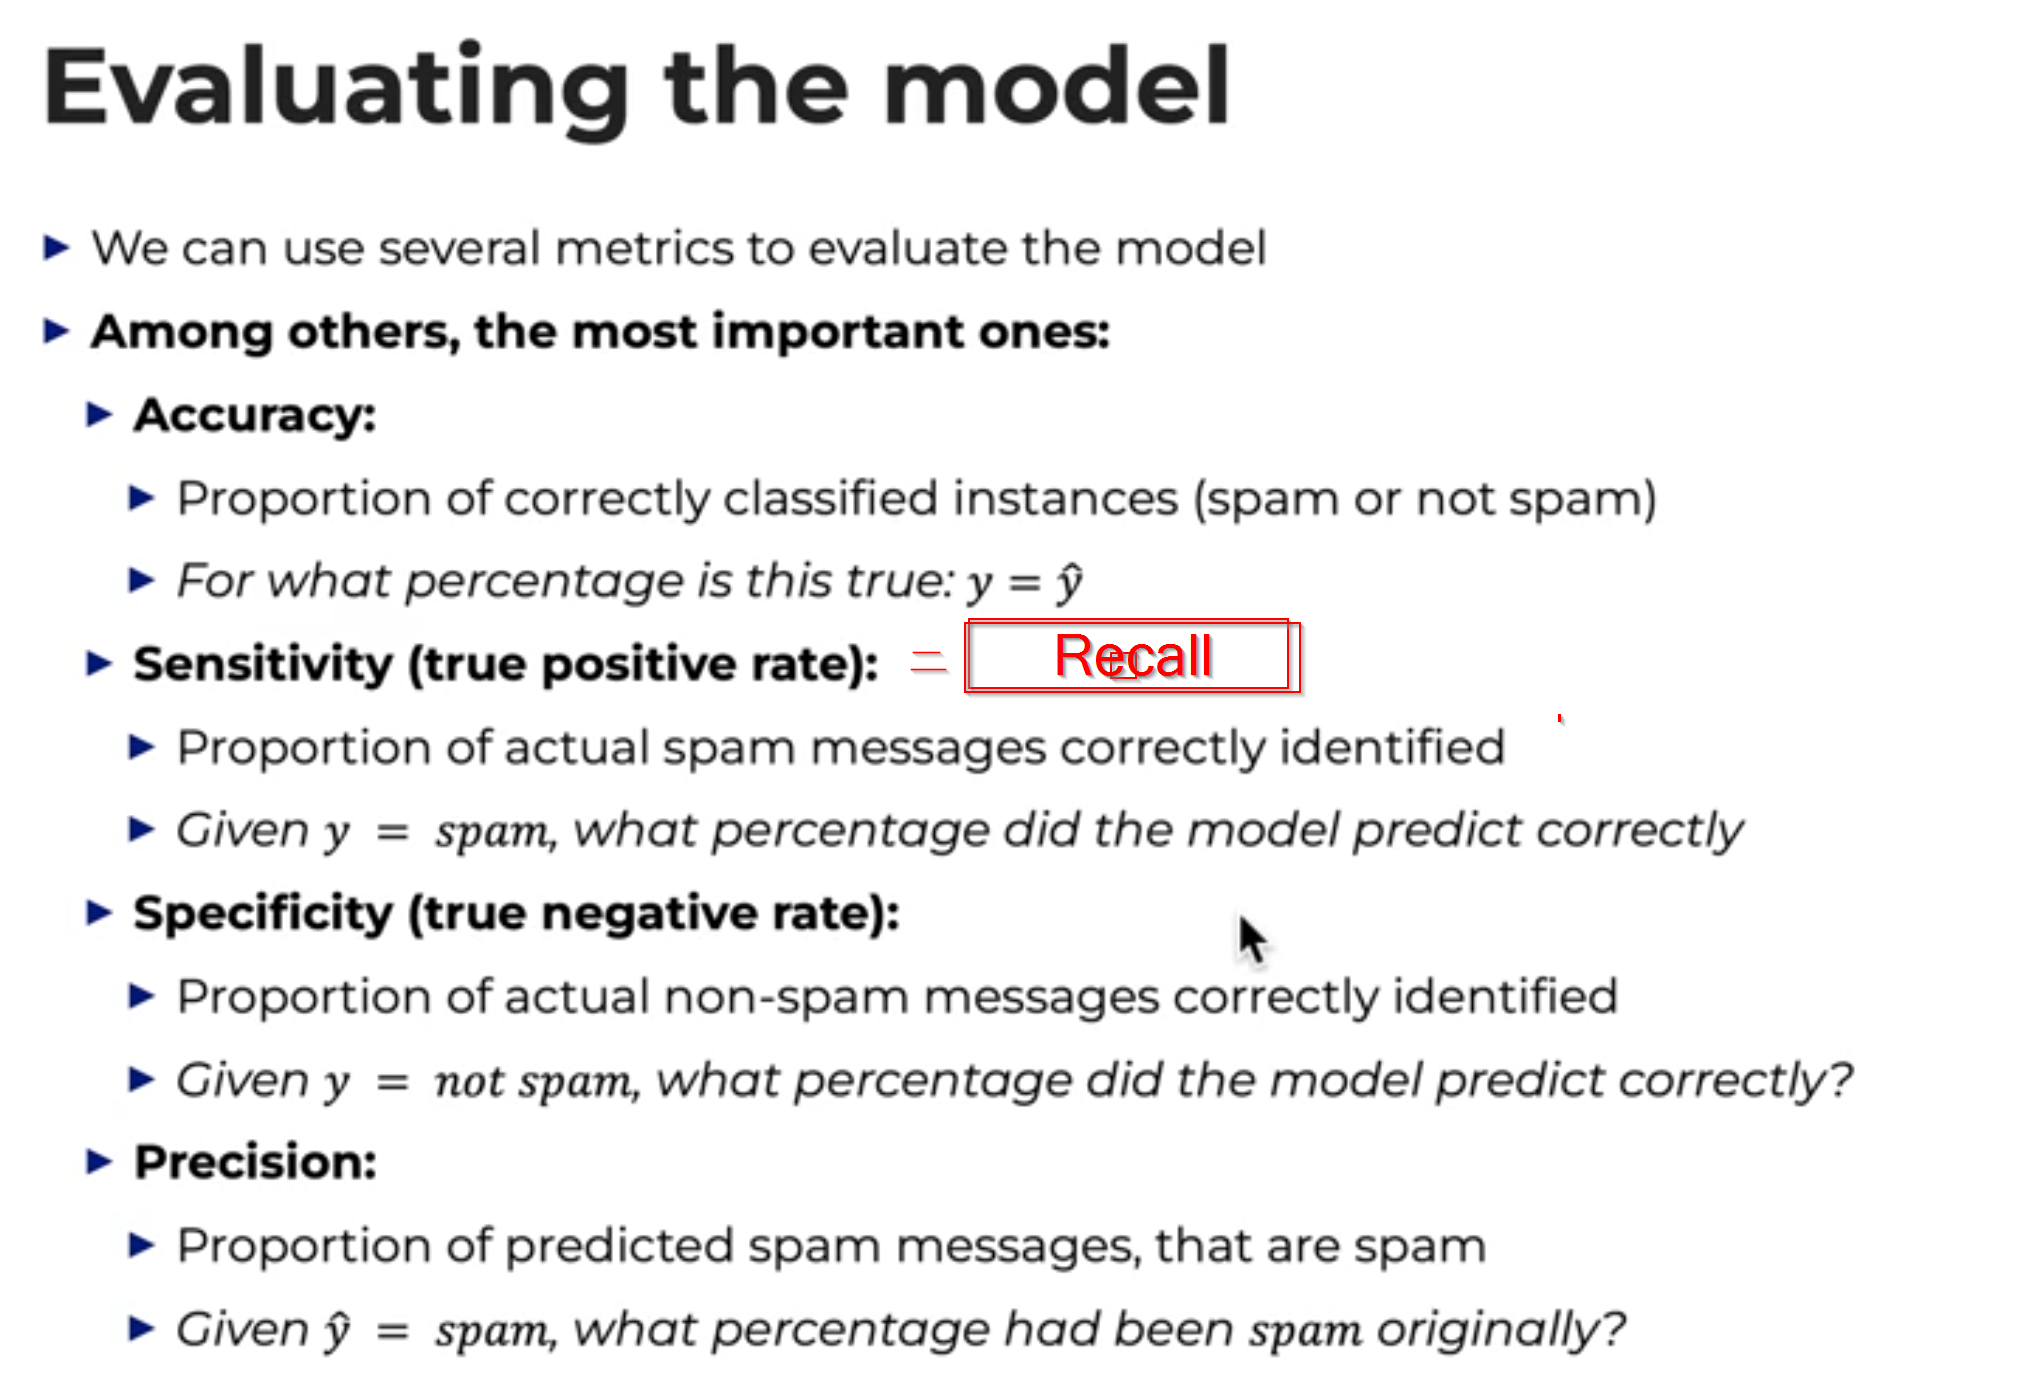

### Why Precision, Recall, and F-Score Are Often Favored Over Sensitivity and Specificity (Despite Recall Being Equivalent to Sensitivity)

You're absolutely right to point out that **recall** and **sensitivity** are mathematically identical—they both measure the proportion of actual positive cases that are correctly identified (True Positives / (True Positives + False Negatives)). This equivalence stems from their shared roots in evaluating binary classification performance. However, the preference for precision, recall, and the F-score (particularly in fields like machine learning, information retrieval, and AI) over sensitivity and specificity isn't about one being "better" in isolation—it's more about context, focus, practicality, and historical conventions. Let me break this down step by step, and I'll use a table to compare the metrics for clarity.

#### 1. **Historical and Field-Specific Origins**
   - **Sensitivity and Specificity** originated in **medical diagnostics and epidemiology** (e.g., evaluating tests for diseases like cancer). They emphasize a balanced view of both classes:
     - **Sensitivity (Recall)**: How well does the test catch all true positives? (Critical in medicine to avoid missing sick patients.)
     - **Specificity**: How well does it avoid false alarms for healthy people? (Important to minimize unnecessary treatments.)
     - This pair is great for scenarios where both false positives (e.g., unnecessary biopsies) and false negatives (e.g., missing a disease) have significant costs, and datasets are often somewhat balanced.
   - **Precision and Recall**, on the other hand, come from **information retrieval (IR)** and **machine learning (ML)** contexts (e.g., search engines or spam detection). They focus primarily on the **positive class** (e.g., relevant search results or spam emails):
     - **Precision**: Of the items you predict as positive, how many are actually positive? (Avoids overwhelming users with irrelevant results.)
     - **Recall (Sensitivity)**: Of all actual positives, how many did you catch? (Ensures you don't miss important items.)
     - In ML/AI, where these metrics dominate, the emphasis is on the "retrieved" or "predicted positive" set, which aligns with tasks like recommendation systems or anomaly detection. F-score (the harmonic mean of precision and recall) was introduced to balance them into a single score, making model comparisons easier.

   In short: Medicine cares about "not harming" both patients and healthy people (hence specificity), while ML often deals with asymmetric costs where missing positives (low recall) or flooding with junk (low precision) is the bigger issue. If you're in tech/ML, precision/recall/F1 feel more intuitive and directly tied to performance goals.

#### 2. **Handling Imbalanced Datasets**
   - Real-world datasets are often **highly imbalanced** (e.g., 99% non-fraud transactions and 1% fraud in banking). Here, overall accuracy (which sensitivity and specificity contribute to via metrics like balanced accuracy) can be misleading— a model that always predicts "negative" could achieve 99% accuracy but fail spectacularly on the rare positive class.
   - **Precision and Recall** shine because they **ignore the negative class entirely** and zoom in on positives:
     - High recall ensures you catch most fraud (sensitivity's strength).
     - High precision ensures you don't flag innocent transactions unnecessarily (complements specificity but focuses on prediction quality).
     - This is crucial in imbalanced scenarios, like detecting rare events (e.g., COVID-19 cases or defective products).
   - **Sensitivity and Specificity** require evaluating both classes, which can dilute focus on the minority class. While you can compute things like the **Youden's Index** (sensitivity + specificity - 1) to balance them, it's less commonly used in ML than the F-score. F1-score (a special case of F-score with equal weight) is tunable (e.g., F0.5 favors precision, F2 favors recall) and provides a quick, single-number summary that's easy to optimize during model training.

#### 3. **Practicality and Standardization in ML/AI Workflows**
   - In ML pipelines (e.g., using libraries like scikit-learn in Python), precision, recall, and F1 are **built-in, easy-to-compute metrics** with clear trade-offs via the precision-recall curve (vs. the ROC curve for sensitivity/specificity, which can be overly optimistic in imbalanced data).
   - **F-score's Balance**: It's the harmonic mean (2 * (precision * recall) / (precision + recall)), which penalizes imbalance between precision and recall more harshly than an arithmetic mean. This makes it ideal for when you can't afford to excel in one at the expense of the other—e.g., in search engines, you want relevant results (precision) without missing key ones (recall). There's no equally standardized "F-score equivalent" for sensitivity/specificity in most ML tools.
   - Reporting: In papers, benchmarks, and leaderboards (e.g., Kaggle competitions), F1 is ubiquitous because it's interpretable and accounts for both errors in positives. Sensitivity/specificity are more common in clinical trials, but even there, precision (often called Positive Predictive Value or PPV) is sometimes paired with sensitivity.

#### 4. **When Sensitivity/Specificity Might Still Be Preferred**
   - They're not obsolete! In balanced datasets or medical contexts, they're excellent—e.g., for ROC-AUC, which plots sensitivity vs. (1 - specificity) and is robust to thresholds.
   - Some fields blend them: In ML for healthcare, you might see all four (precision = PPV, recall = sensitivity, and specificity/NPV for negatives).
   - But in general AI/ML discourse, precision/recall/F1 win because they align with "user-facing" performance: What fraction of my recommendations are good? Did I miss any good ones?

#### Comparison Table: Key Metrics Side-by-Side
To make this concrete, here's a quick table comparing the metrics using a confusion matrix (TP = True Positives, FP = False Positives, TN = True Negatives, FN = False Negatives). Assume a binary classifier predicting "positive" vs. "negative."

| Metric          | Formula                          | Focus                          | Strengths in Context                  | Common Use Case Example              |
|-----------------|----------------------------------|--------------------------------|---------------------------------------|--------------------------------------|
| **Recall (Sensitivity)** | TP / (TP + FN)                  | Catching all actual positives  | Avoids missing rare events; identical across fields | Medical test: % of sick patients correctly identified |
| **Specificity** | TN / (TN + FP)                  | Correctly identifying negatives| Minimizes false alarms on majority class | Medical test: % of healthy patients correctly identified |
| **Precision**   | TP / (TP + FP)                  | Quality of positive predictions| Reduces noise in retrieved results; key for imbalanced data | Search engine: % of top results that are relevant |
| **F-Score (F1)**| 2 * (Precision * Recall) / (Precision + Recall) | Balance between precision & recall | Single metric for trade-offs; tunable for priorities | ML model evaluation: Balancing spam detection (catch spam without flagging emails) |

#### Final Thoughts
People favor precision, recall, and F-score in ML/AI because they provide a **positive-class-centric, imbalance-resistant toolkit** that's standardized and actionable for modern applications—think Netflix recommendations or autonomous driving alerts. Sensitivity and specificity are fantastic for diagnostic balance but can feel less focused when positives are the star of the show. If your work is in medicine, stick with sens/spec; for tech, precision/recall/F1 will serve you better. If you have a specific scenario (e.g., a dataset or task), I can dive deeper into which metrics to prioritize! 😊